In [2]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def ewma(x, alpha):
    '''
    Returns the exponentially weighted moving average of x.

    Parameters:
    -----------
    x : array-like
    alpha : float {0 <= alpha <= 1}

    Returns:
    --------
    ewma: numpy array
          the exponentially weighted moving average
    '''
    # Coerce x to an array
    x = np.array(x)
    n = x.size

    # Create an initial weight matrix of (1-alpha), and a matrix of powers
    # to raise the weights by
    w0 = np.ones(shape=(n,n)) * (1-alpha)
    p = np.vstack([np.arange(i,i-n,-1) for i in range(n)])

    # Create the weight matrix
    w = np.tril(w0**p,0)

    # Calculate the ewma
    return np.dot(w, x[::np.newaxis]) / w.sum(axis=1)

def show_plots(path,name):
    reward = np.load("training_data/"+ path +"_reward.npy")
    frame_reward = np.load("training_data/"+ path +"_frame_reward.npy")
    loss = np.load("training_data/"+ path +"_loss.npy")
    
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title(name + ' Reward (Moving Average)')
    plt.xlabel("Episode Played")
    plt.ylabel("Episode Reward")
    # plt.plot(ewma(reward,0.01))
    plt.plot(moving_average(reward,1000))
    
    plt.subplot(132)
    plt.title(name + ' Loss (Moving Average)')
    plt.plot(moving_average(np.log(loss),2000))

    # plt.plot(ewma(loss,0.5))
    plt.subplot(133)
    plt.title(name + ' Frame Reward (Moving Average)')
    # plt.plot(ewma(loss,0.5))
    plt.plot(moving_average(frame_reward,100000))

    plt.show()


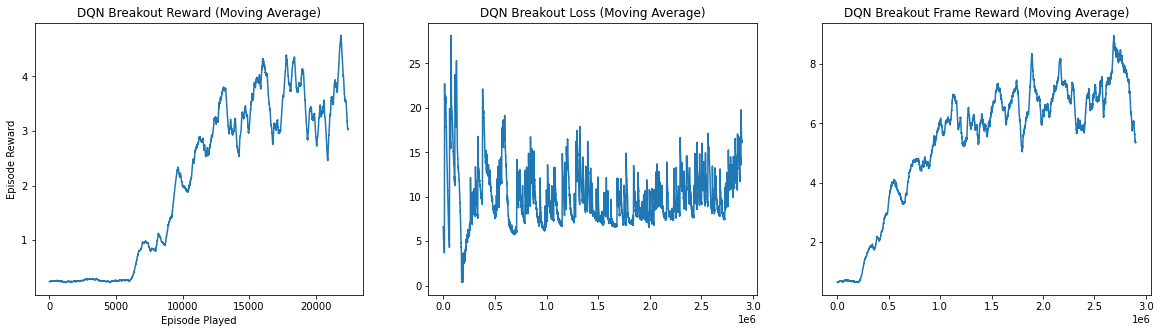

In [2]:
show_plots("dqn_breakout_crop","DQN Breakout")

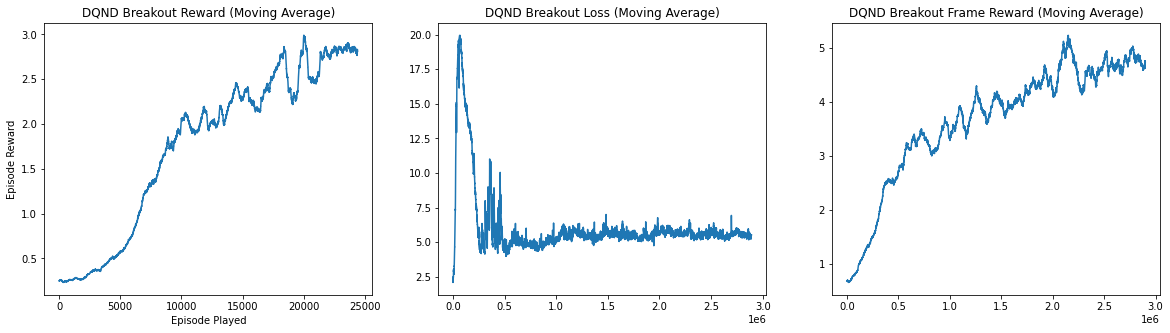

In [3]:
show_plots("dqnd_breakout_crop","DQND Breakout")

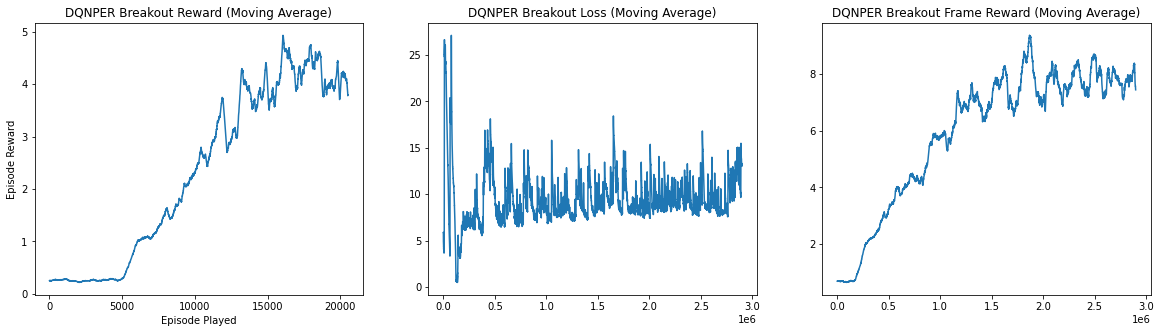

In [3]:
show_plots("dqnper_breakout_crop","DQNPER Breakout")

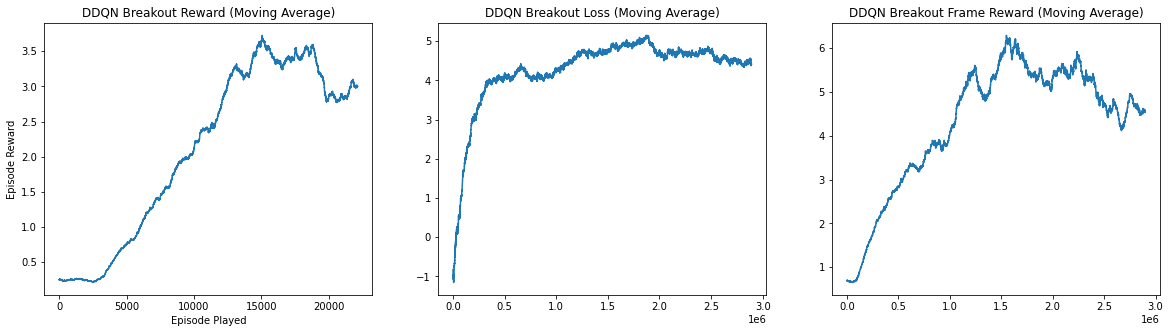

In [4]:
show_plots("ddqn_breakout_crop","DDQN Breakout")

In [ ]:
show_plots("dqnall_breakout_crop","DDQN Breakout")


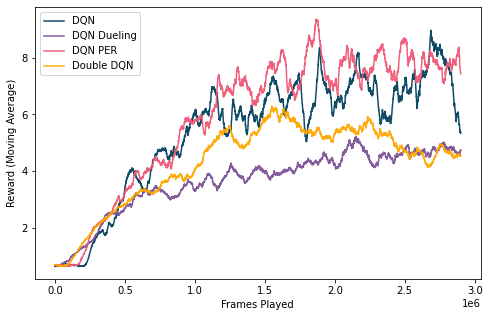

In [4]:
# Test

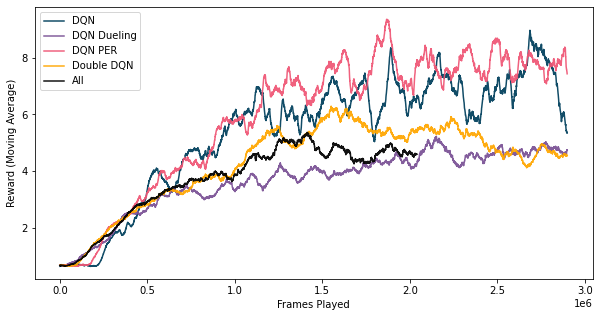

In [17]:
import math

epsilon_start = 1.0
epsilon_final = 0.05
epsilon_decay = 500000
epsilon_by_frame = lambda frame_idx: epsilon_final + (epsilon_start - epsilon_final) * math.exp(-1. * frame_idx / epsilon_decay)
replay_initial = 100000



epsilons = []
for i in range(3000000):
    epsilons.append(epsilon_by_frame(i))



plt.figure(figsize=(10,5))

# Define data values
# x = range(100000)
dqn = moving_average(np.load("training_data/dqn_breakout_crop_frame_reward.npy"),100000)
# dqn_b = moving_average(np.load("training_data/dqn_breakout_crop_frame_reward.npy"),3000)
dqnd = moving_average(np.load("training_data/dqnd_breakout_crop_frame_reward.npy"),100000)
dqnper = moving_average(np.load("training_data/dqnper_breakout_crop_frame_reward.npy"),100000)
ddqn = moving_average(np.load("training_data/ddqn_breakout_crop_frame_reward.npy"),100000)
dqnall = moving_average(np.load("training_data/dqnall_breakout_crop_frame_reward.npy"),100000)


# Plot a simple line chart
plt.plot(dqn, color='#003f5cEE')

# Plot another line on the same chart/graph
plt.plot(dqnd, color='#7a5195EE')

plt.plot(dqnper, color='#ef5675EE')

plt.plot(ddqn, color='#ffa600EE')

# plt.plot(dqnall, color='#000000EE')


# plt.plot(dqn_b, color='#003f5c20')
plt.xlabel("Frames Played")
plt.ylabel("Reward (Moving Average)")

# plt.plot(np.array(epsilons)*6, 'b')

# plt.ylim(0, 10)


plt.legend(['DQN', 'DQN Dueling',"DQN PER","Double DQN"])
plt.savefig('Summary.png', bbox_inches='tight', pad_inches=0)
plt.show()

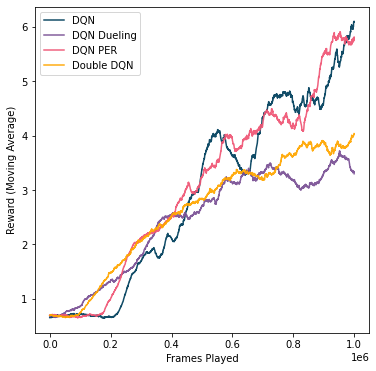

In [16]:
plt.figure(figsize=(6,6))

# Define data values
# x = range(100000)
dqn = moving_average(np.load("training_data/dqn_breakout_crop_frame_reward.npy"),100000)
# dqn_b = moving_average(np.load("training_data/dqn_breakout_crop_frame_reward.npy"),3000)
dqnd = moving_average(np.load("training_data/dqnd_breakout_crop_frame_reward.npy"),100000)
dqnper = moving_average(np.load("training_data/dqnper_breakout_crop_frame_reward.npy"),100000)
ddqn = moving_average(np.load("training_data/ddqn_breakout_crop_frame_reward.npy"),100000)


# Plot a simple line chart
plt.plot(dqn[:1000000], color='#003f5cEE')

# Plot another line on the same chart/graph
plt.plot(dqnd[:1000000], color='#7a5195EE')

plt.plot(dqnper[:1000000], color='#ef5675EE')

plt.plot(ddqn[:1000000], color='#ffa600EE')


# plt.plot(dqn_b, color='#003f5c20')
plt.xlabel("Frames Played")
plt.ylabel("Reward (Moving Average)")

# plt.plot(np.array(epsilons)*6, 'b')

# plt.ylim(0, 10)


plt.legend(['DQN', 'DQN Dueling',"DQN PER","Double DQN","Epsilon(x6)"])
plt.show()